In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# X_train, y_train, X_valid, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

In [ ]:
X_train = X_train/255
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
print(X_train.shape)

(60000, 28, 28, 1)


In [ ]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='elu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(lr=1e-3),
        metrics=['accuracy']
    )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               128500    
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [ ]:
len(X_train), len(y_train)

(60000, 60000)

In [ ]:
patience = 3
stop_patience = 5
factor = 0.1
callbacks = [
    ModelCheckpoint("lenet.h5", save_best_only=True, verbose = 0),
    EarlyStopping(patience=stop_patience, monitor='val_loss', verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience, min_lr=1e-6, verbose=1)
]

In [ ]:
batch_size=32
epochs=20
history = model.fit(X_train, 
          y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          callbacks=callbacks,
          verbose=1)

Epoch 1/20
1500/1500 [==============================] - 31s 20ms/step - loss: 0.1672 - accuracy: 0.9490 - val_loss: 0.0763 - val_accuracy: 0.9779
Epoch 2/20
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0644 - accuracy: 0.9796 - val_loss: 0.0634 - val_accuracy: 0.9815
Epoch 3/20
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0459 - accuracy: 0.9856 - val_loss: 0.0594 - val_accuracy: 0.9838
Epoch 4/20
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0350 - accuracy: 0.9888 - val_loss: 0.0582 - val_accuracy: 0.9847
Epoch 5/20
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0291 - accuracy: 0.9904 - val_loss: 0.0536 - val_accuracy: 0.9872
Epoch 6/20
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0238 - accuracy: 0.9924 - val_loss: 0.0551 - val_accuracy: 0.9872
Epoch 7/20
1500/1500 [==============================] - 31s 20ms/step - loss: 0.0216 - accuracy: 0.9932 - val_loss: 0.0593 -

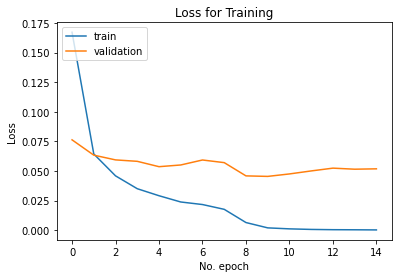

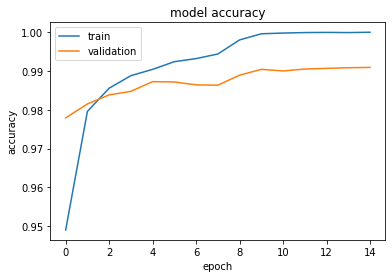

In [ ]:
plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
X_test = X_test/255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.0460 - accuracy: 0.9919


[0.046000294387340546, 0.9919000267982483]

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
import numpy as np
prediction = model.predict(X_test)
y_pred = [np.argmax(prediction[i]) for i in range(len(X_test))]

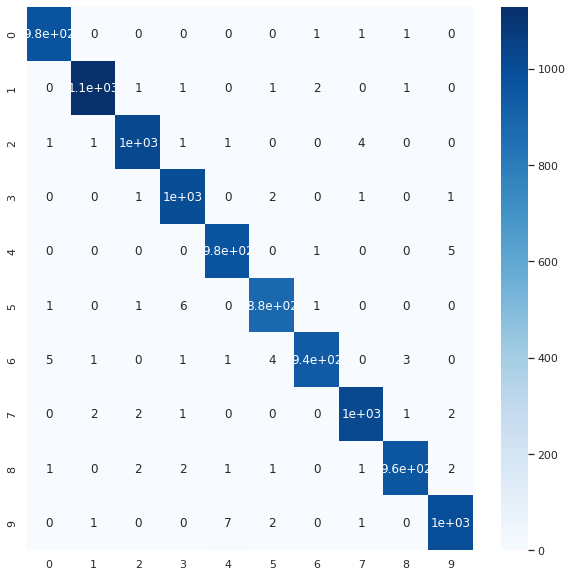

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
labels = [_ for _ in range(10)]
confusion_matrix = confusion_matrix(y_test, y_pred, labels)
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

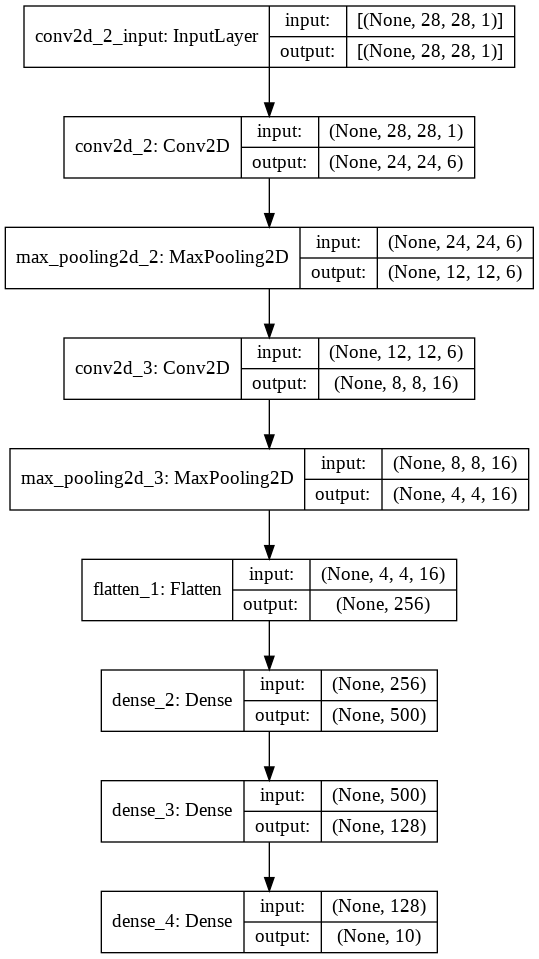

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)